<a href="https://colab.research.google.com/github/mohsina-bilal/Digit-Recognition/blob/main/logisticRegression_digitRecognition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all libraries required
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#uploading and assigning the dataset of digits
digits_data=load_digits()

In [ ]:
#determine total number of images and labels
print("Image data shape:",digits_data.data.shape)
print("Label data shape:", digits_data.target.shape)

Image data shape: (1797, 64)
Label data shape: (1797,)


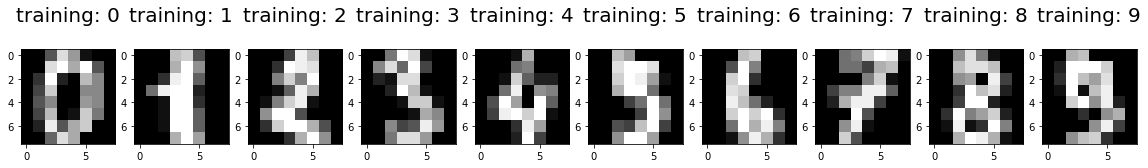

In [ ]:
#displaying images and understanding the data
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits_data.data[0:10],digits_data.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i\n'% label,fontsize=20)

In [ ]:
#diving data into train and test (split) 
x_train,x_test,y_train,y_test=train_test_split(digits_data.data,digits_data.target,test_size=0.23,random_state=2)

In [ ]:
#Building the logistic regression model
from sklearn.linear_model import LogisticRegression
logisticRegr=LogisticRegression(solver='lbfgs', max_iter=10000) #was giving warning of convergence for max_iter=100 which is default
logisticRegr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#predicting outputs on test data for various no.of data points
#for first element of test dataset
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

#for first 10 elements
print(logisticRegr.predict(x_test[0:10]))

#for entire test dataset
predictions=logisticRegr.predict(x_test)

[4]
[4 0 9 1 8 7 1 5 1 6]


In [ ]:
#determining model accuracy
score= logisticRegr.score(x_test,y_test)
print(score)

0.9492753623188406


In [ ]:
#creating confusion matrix to understand model performance
con_matrix=metrics.confusion_matrix(y_test,predictions)
print(con_matrix)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


Text(0.5, 1.0, 'Accuracy Score:0.9492753623188406')

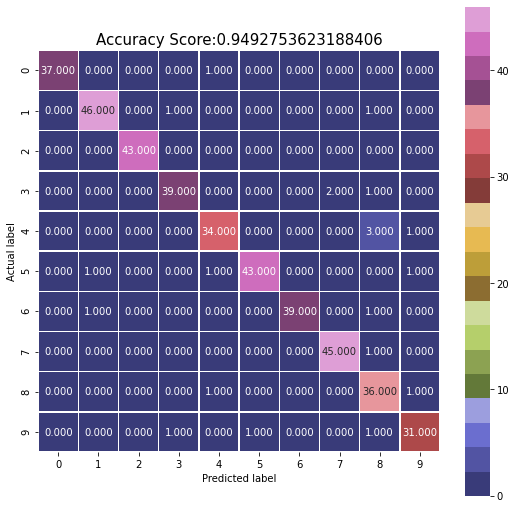

In [ ]:
#representing confusion matrix through heatmap
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix,annot=True,fmt=".3f",linewidth=0.5,square=True,cmap='tab20b');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size=15)

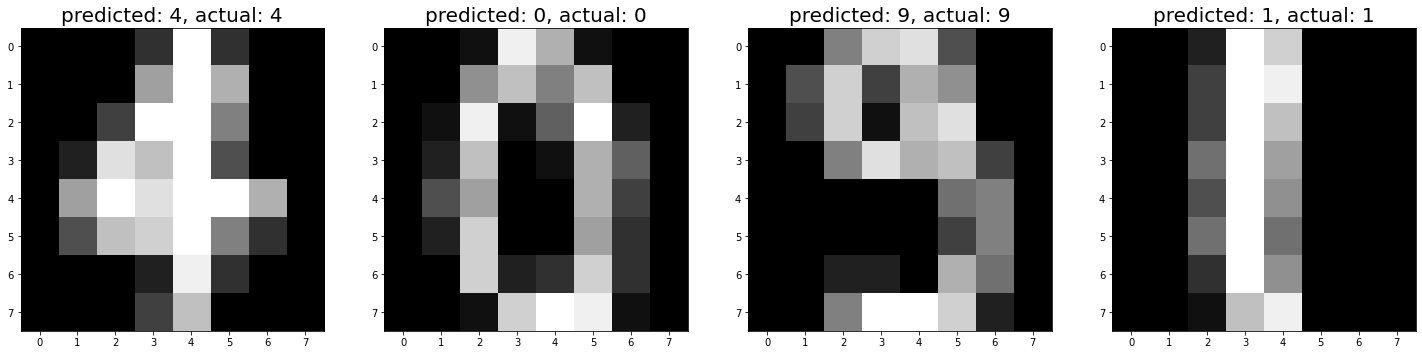

In [ ]:
#zip() function creates an iterator that will aggregate elements from two or more iterables.
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object.
index=0
misclassifiedIndex=[]
for predict,actual in zip(predictions,y_test):
  if predict==actual:
    misclassifiedIndex.append(index)
  index+=1
plt.figure(figsize=(25,8))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted: {}, actual: {}".format(predictions[wrong],y_test[wrong]),fontsize=20)
    